# **Методы машинного обучения. Лабораторная работа №1**
# Разведочный анализ данных. Исследование и визуализация данных.

*   Импорты библиотек

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as pltl

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbrn
from sklearn import datasets

# Подготовка датасета

*   Импорт wine датасета из библиотеки *sklearn*

In [0]:
wine = datasets.load_wine()
type(wine)

sklearn.utils.Bunch

In [0]:
# Поля объекта датасета
for x in wine:
  print(x)

data
target
target_names
DESCR
feature_names


In [0]:
# Наименование целевых признаков
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [0]:
# Наименование переменных датасета
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
# Размерность выборки
wine['data'].shape

(178, 13)

In [0]:
# Размерность целевой выборки
wine['target'].shape

(178,)

*   "Склейка" таблицы данных и целевой выборки с помощью *numpy*

In [0]:
np.c_[wine['data'], wine['target']]

array([[  14.23,    1.71,    2.43, ...,    3.92, 1065.  ,    0.  ],
       [  13.2 ,    1.78,    2.14, ...,    3.4 , 1050.  ,    0.  ],
       [  13.16,    2.36,    2.67, ...,    3.17, 1185.  ,    0.  ],
       ...,
       [  13.27,    4.28,    2.26, ...,    1.56,  835.  ,    2.  ],
       [  13.17,    2.59,    2.37, ...,    1.62,  840.  ,    2.  ],
       [  14.13,    4.1 ,    2.74, ...,    1.6 ,  560.  ,    2.  ]])

*   Подготовка датафрейма с помощью *pandas*

In [0]:
data1 = pd.DataFrame(data = np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target_names'] )

In [0]:
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


Также разделим наблюдения по целевым признакам - по классам

In [0]:
dataByClasses = {}
for className in wine['target_names']:
  dataByClasses[className] = data1[data1['target_names']==int(className[-1])]

# Использование MatplotLib



*   Распределение *alcohol* и *color_intensity* по классам




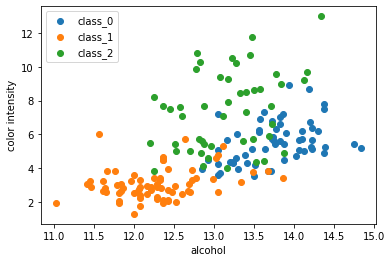

In [0]:
ax = plt.subplot()
ax.set_ylabel('color intensity')
ax.set_xlabel('alcohol')

for key in dataByClasses:
  ax.scatter(dataByClasses[key]['alcohol'], dataByClasses[key]['color_intensity'], label = key)

ax.legend()
plt.show()



*   BarChart с распределением максимальных и минимальных значений параметра *hue* по классам



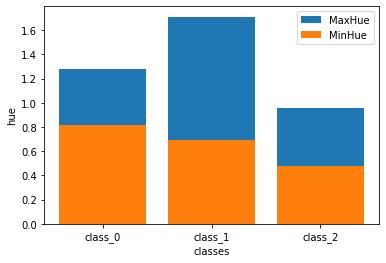

In [0]:
ax0 = plt.subplot()
ax0.set_ylabel('hue')
ax0.set_xlabel('classes')

maxData = []
minData = []
keys = []

for key in dataByClasses:
  keys.append(key)
  maxData.append(max(dataByClasses[key]['hue']))
  minData.append(min(dataByClasses[key]['hue']))
  
ax0.bar(keys, maxData, label='MaxHue')
ax0.bar(keys, minData, label='MinHue')
ax0.legend()
plt.show()

# Использование Plotly



*   PieChart с распределением данных по классам



In [0]:
names = []
values= []

for key in dataByClasses:
  values.append(len(dataByClasses[key]))
  names.append(key)

dataForPie = pd.DataFrame(data = np.c_[names, values], columns= ['Class Name', 'Count of observations'])
pltl.pie(dataForPie, names='Class Name', values='Count of observations')

  Class Name Count of observations
0    class_0                    59
1    class_1                    71
2    class_2                    48


*   Распределение переменных  *flavanoids* и *total_phenols* по классам


In [0]:
fig = make_subplots(rows=3, cols=1)

counter = 1
for key in dataByClasses:
  fig.add_trace(go.Scatter(x=dataByClasses[key]['flavanoids'] ,y=dataByClasses[key]['total_phenols'], mode='markers', name=key), 
                row=counter, 
                col=1)
  counter+=1
fig.update_layout(
    autosize=True,
    height=600
)
fig.show()

# Матрица корреляции с использованием Seaborn


В датафрейме data1 содержится колонка *target_names*, которую необходимо отбросить для корреляционного анализа (она содержит численное значение класса наблюдения)

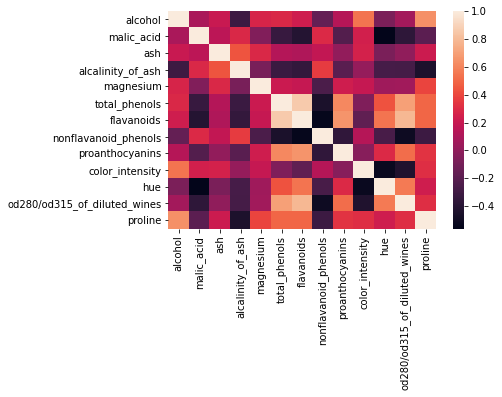

In [0]:
data2 = data1.drop(['target_names'], axis=1)
sbrn.heatmap(data2.corr())

По результатам корреляционного анализа можно обратить внимание на то, что переменне *flavanoids* и *total_phenols* имеют один из наибольших коэффициентов корреляции. Их распределение было продемонстрировано раннее